# 5 ddim steps

In [29]:
from tambo_3D_diffusion_generator import PlaneDiffusionEvaluator
import torch


# Initialize with custom parameters
generator = PlaneDiffusionEvaluator(
    data_dir =  "/n/netscratch/arguelles_delgado_lab/Everyone/hhanif/tambo_simulation_nov_25/pre_processed_3rd_step/",
    checkpoint_path =  "/n/netscratch/arguelles_delgado_lab/Everyone/hhanif/tambo_simulation_nov_25/checkpoints/tam_unet/epoch_epoch=1229-val_loss_val_loss=0.0333.ckpt",
    ddim_steps =  5,
    eta =  0.0,
    guidance_w =  1.8,
    imports_path = "/n/holylfs05/LABS/arguelles_delgado_lab/Everyone/hhanif/tambo_optimization/unet"
    )

Initialized PlaneDiffusionEvaluator
Device: cuda:0


In [30]:
generator.load_model()


Model parameters: 12,408,387
Loaded checkpoint: /n/netscratch/arguelles_delgado_lab/Everyone/hhanif/tambo_simulation_nov_25/checkpoints/tam_unet/epoch_epoch=1229-val_loss_val_loss=0.0333.ckpt
DDIM sampler built (ddim_steps=5, eta=0.0, w=1.8)
Model loading time: 0.50s


In [31]:
(energy, class_id, sin_z, cos_z, sin_a, cos_a) = (0.2398,  1.0000,  0.6737, -0.7390, -0.3746, -0.9272)


In [32]:

generator.test_conditions = torch.tensor([[energy, class_id, sin_z, cos_z, sin_a, cos_a]])


In [33]:
outputs = generator.generate_samples(num_samples=1, num_conditions=1, chunk_size=1)

✔ Done: generated 1 images across 1 conditions.
Total generation time: 2.20s


In [34]:
outputs[0]

{'condition': tensor([ 0.2398,  1.0000,  0.6737, -0.7390, -0.3746, -0.9272]),
 'images': tensor([[[[[-0.0266, -0.0310, -0.0270,  ..., -0.0321, -0.0299, -0.0316],
            [-0.0269, -0.0317, -0.0232,  ..., -0.0285, -0.0347, -0.0323],
            [-0.0290, -0.0297, -0.0290,  ..., -0.0314, -0.0325, -0.0304],
            ...,
            [-0.0322, -0.0345, -0.0345,  ..., -0.0304, -0.0317, -0.0298],
            [-0.0327, -0.0340, -0.0350,  ..., -0.0318, -0.0314, -0.0219],
            [-0.0190, -0.0302, -0.0322,  ..., -0.0290, -0.0286, -0.0122]],
 
           [[-0.0147, -0.0166, -0.0153,  ..., -0.0151, -0.0127, -0.0132],
            [-0.0144, -0.0185, -0.0162,  ..., -0.0151, -0.0164, -0.0169],
            [-0.0146, -0.0139, -0.0153,  ..., -0.0147, -0.0148, -0.0148],
            ...,
            [-0.0139, -0.0133, -0.0142,  ..., -0.0130, -0.0118, -0.0155],
            [-0.0134, -0.0162, -0.0133,  ..., -0.0147, -0.0128, -0.0150],
            [-0.0101, -0.0157, -0.0148,  ..., -0.0134, -0.014

p_energy: 0.23980000615119934
class_id: 1.0
sin_z: 0.6736999750137329
cos_z: -0.7390000224113464
sin_a: -0.37459999322891235
cos_a: -0.9272000193595886


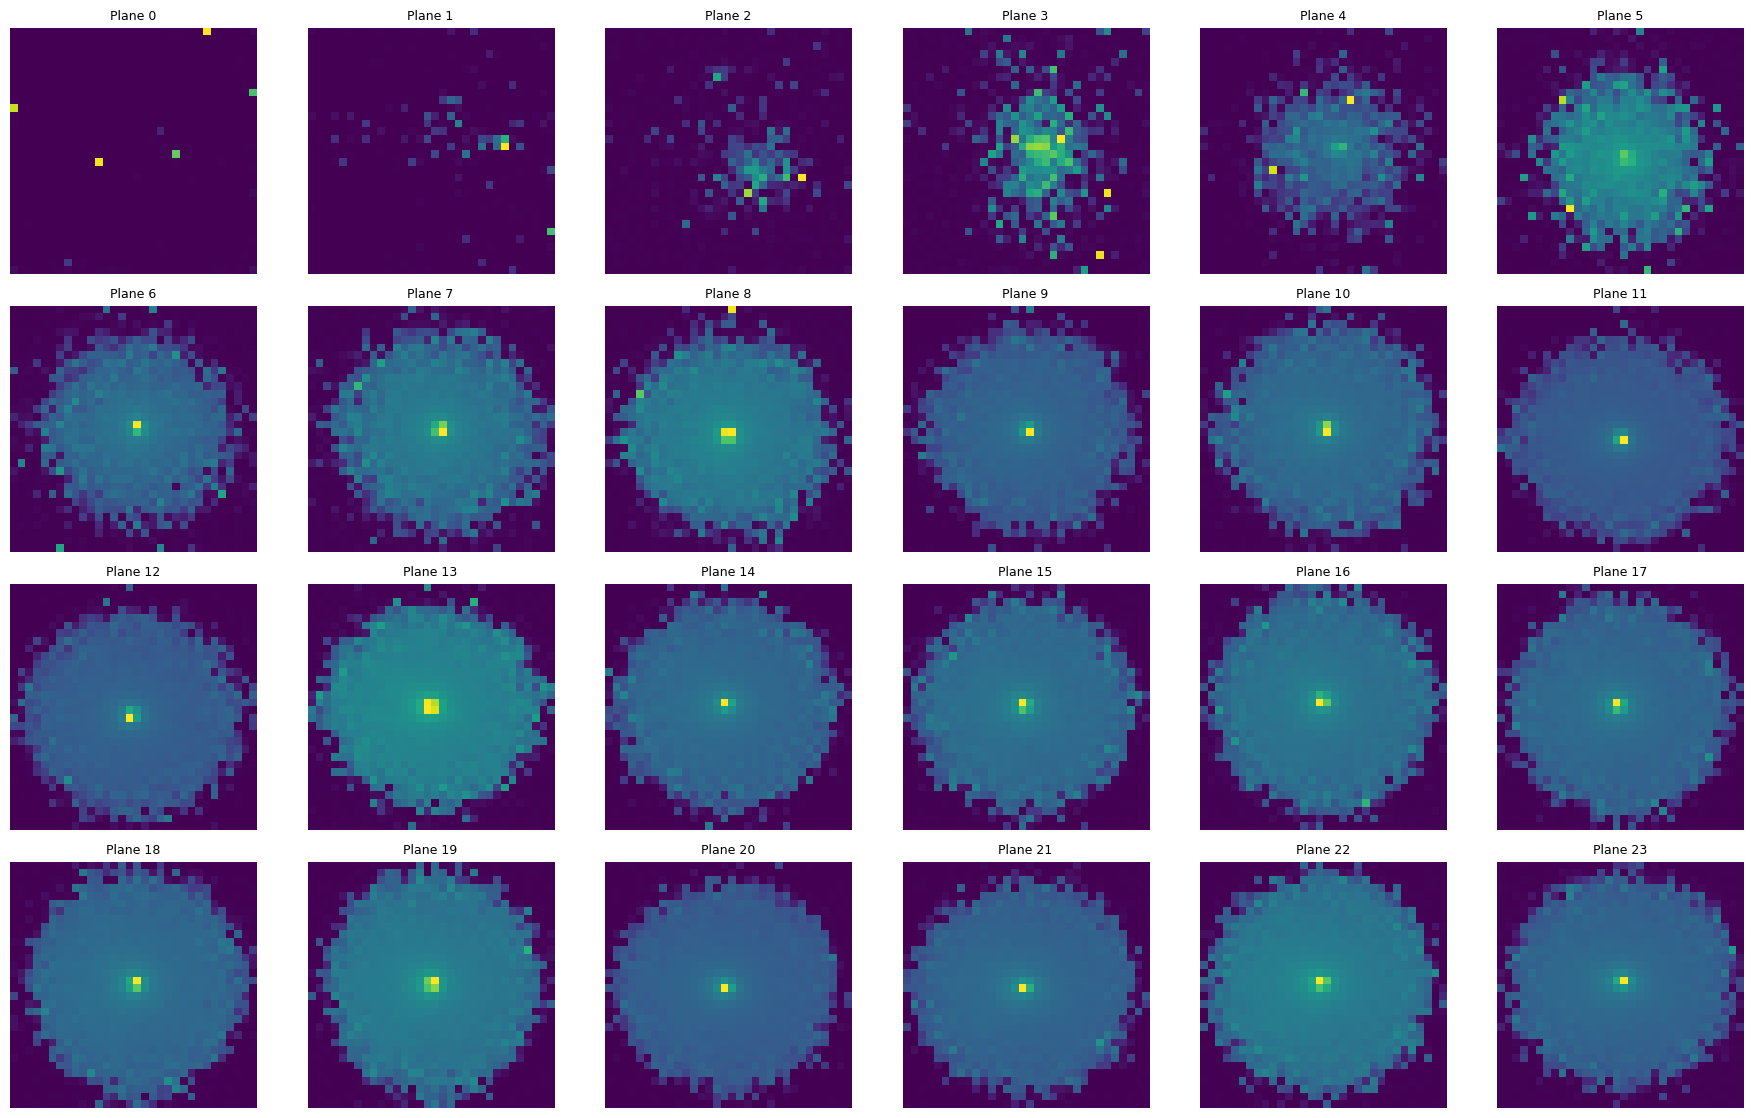

In [35]:
import matplotlib.pyplot as plt


for output in outputs:
    condition_name = [ 'p_energy', 'class_id', 'sin_z', 'cos_z', 'sin_a', 'cos_a' ]
    for icondition, condition in enumerate(output['condition']):
        print(f"{condition_name[icondition]}: {condition}")

    output_images = output['images'].squeeze().mean(dim=1)
    
    # Plot all 24 planes
    fig, axes = plt.subplots(4, 6, figsize=(18, 12))
    
    for plane_idx in range(24):
        ax = axes[plane_idx // 6, plane_idx % 6]
        plane_data = output_images[plane_idx].cpu().numpy()
        # Normalize to [0, 1]
        plane_data = (plane_data - plane_data.min()) / (plane_data.max() - plane_data.min())
        ax.imshow(plane_data, cmap='viridis')#, vmin=0, vmax=1)
        ax.set_title(f"Plane {plane_idx}", fontsize=9)
        ax.axis('off')
        # ax.cbar
    
    plt.tight_layout(rect=(0, 0.03, 1, 0.97))
    break

In [36]:
# add scaling
from tambo_3D_fnn_scaler import PlaneFNNGenerator
import torch

# Initialize
generator = PlaneFNNGenerator(
    data_dir="/n/holylfs05/LABS/arguelles_delgado_lab/Everyone/zdimitrov/tambo_simulations/pre_processed_3rd_step_min_50/",
    checkpoint_path="/n/holylfs05/LABS/arguelles_delgado_lab/Everyone/zdimitrov/tambo_simulations/checkpoints/tam_fnn/last.ckpt",
    output_dir="fnn_outputs",
    imports_path="/n/home05/zdimitrov/tambo/TambOpt/ml/scaling_NN/FNN/"
)


Initialized PlaneFNNGenerator
Device: cuda:0
Output directory: fnn_outputs


In [37]:

# Load model
generator.load_model()

# Set conditions (energy, class_id, sin_z, cos_z, sin_a, cos_a)
generator.test_conditions = torch.tensor([[energy, class_id, sin_z, cos_z, sin_a, cos_a]])

# Generate bbox predictions
outputs = generator.generate_samples(num_samples=1, num_conditions=1)


Loaded standardization stats from: /n/holylfs05/LABS/arguelles_delgado_lab/Everyone/zdimitrov/tambo_simulations/pre_processed_3rd_step_min_50/global_bbox_stats.pt
  Mean: 90.71444702148438
  Std: 140.77218627929688
Model parameters: 3,751,008
Loaded checkpoint: /n/holylfs05/LABS/arguelles_delgado_lab/Everyone/zdimitrov/tambo_simulations/checkpoints/tam_fnn/last.ckpt
Using EMA weights for inference
Model parameters: 3,751,008
Model loading time: 0.12s
Condition 1/1: generated 1 bbox predictions
Done: generated 1 bbox predictions across 1 conditions.
Total generation time: 0.00s


In [38]:
outputs[0]['bboxes']

tensor([[[ 20.6740,  21.2731,   1.0109,   1.6180],
         [ 41.2309,  42.6653,   1.8654,   3.3055],
         [ 62.0765,  63.7327,   3.0300,   4.6977],
         [ 82.9368,  84.7642,   4.2340,   6.0588],
         [103.7410, 105.8535,   5.3291,   7.5048],
         [124.5191, 127.0066,   6.4092,   8.9697],
         [145.1549, 148.2648,   7.3563,  10.5311],
         [165.7690, 169.5994,   8.2910,  12.2167],
         [186.2912, 190.9944,   9.1431,  13.9309],
         [206.7312, 212.4189,   9.9348,  15.7182],
         [227.1258, 233.9401,  10.6630,  17.5384],
         [247.4890, 255.5284,  11.3065,  19.4427],
         [267.7610, 277.1440,  11.9491,  21.4028],
         [287.9738, 298.8694,  12.4419,  23.4469],
         [307.7812, 320.9459,  12.6491,  25.8453],
         [328.1267, 342.5029,  13.3179,  27.7316],
         [348.1584, 364.4140,  13.6250,  29.9930],
         [368.0615, 386.4701,  13.8713,  32.3520],
         [387.8987, 408.5507,  14.0091,  34.7435],
         [407.6628, 430.6883,  